# Задание №3. Алгоритмы классификации и регрессии

## Классификация

Примените к данным cancer.csv методы:
1. AdaBoost. (sklearn.ensemble.AdaBoostClassifier)
2. SVM (sklearn.svm.SVC). Поэкспериментируйте с ядрами и константой C: что меняется в решении?

Выберите лучшую модель.


## Регрессия

Примените к данным noisysine.csv и hydrodynamics.csv методы:
1. Полиномиальную регрессию без регуляризации (для датасета noisysine – степеней от 2 до 5, для датасета hydrodynamics – степени 2).
2. Гребневая регрессия. Найдите оптимальный параметр регуляризации.
3. LASSO. Найдите оптимальный параметр регуляризации. Сколько признаков используется в лучшей конфигурации?

Оцените работу методов через R-score.

In [195]:
import pandas as pd
import seaborn as sns
import numpy as np

CANCER_DATASET_PATH = "cancer_eda.csv"

In [196]:
from sklearn.ensemble import AdaBoostClassifier

In [232]:
df = pd.read_csv(CANCER_DATASET_PATH)
df

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
569,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,...,22.250,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
570,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,...,22.250,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
571,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [263]:
columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9',
           '10', '11', '12', '13', '14', '15', '16', '17',
           '18', '19', '20', '21', '22', '23', '24', '25',
           '26', '27', '28', '29', '30']

y = df['label']
X = df[columns]

msk = np.random.rand(len(df)) < 0.8

X_train = X[msk]
X_test = X[~msk]

y_train = y[msk]
y_test = y[~msk]

X_train

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039
569,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,...,22.250,21.40,152.40,1461.0,0.15450,0.39490,0.3853,0.2550,0.4066,0.10590
570,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,...,22.250,21.40,152.40,1461.0,0.15450,0.39490,0.3853,0.2550,0.4066,0.10590


In [264]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [266]:
clf.predict(X_test)

array(['M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B'], dtype=object)

In [268]:
y_test.to_numpy()

array(['M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [273]:
res = clf.predict(X_test)==y_test.to_numpy()
res

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False])

In [280]:
count_F = 0
count_T = 0
for i in res:
    if i:
        count_T += 1
    else:
        count_F += 1
count_F/count_T

0.0784313725490196

In [284]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [308]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', C=1))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [309]:
clf.predict(X_test)

array(['M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M'], dtype=object)

In [310]:
y_test.to_numpy()

array(['M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [311]:
res = clf.predict(X_test)==y_test.to_numpy()
res

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [312]:
count_F = 0
count_T = 0
for i in res:
    if i:
        count_T += 1
    else:
        count_F += 1
count_F/count_T

0.047619047619047616

In [350]:
v = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
for i in range(1, 20):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', C=i, kernel=kernels[2]))
    clf.fit(X_train, y_train)
    res = clf.predict(X_test)==y_test.to_numpy()
    count_F = 0
    count_T = 0
    for i in res:
        if i:
            count_T += 1
        else:
            count_F += 1
    v.append(count_F/count_T)
v

[0.047619047619047616,
 0.03773584905660377,
 0.028037383177570093,
 0.028037383177570093,
 0.028037383177570093,
 0.047619047619047616,
 0.057692307692307696,
 0.057692307692307696,
 0.057692307692307696,
 0.06796116504854369,
 0.06796116504854369,
 0.06796116504854369,
 0.06796116504854369,
 0.06796116504854369,
 0.06796116504854369,
 0.06796116504854369,
 0.0784313725490196,
 0.0784313725490196,
 0.0784313725490196]

С kernel='linear' и C=5, CVS в несколько раз превосходит AdaBoost

In [354]:
df_noise = pd.read_csv('noisysine.csv')
df_hydro = pd.read_csv('hydrodynamics.csv')

In [357]:
df_noise.head()

,x,y
0,0,0.35552
1,1,0.51179
2,2,1.08470
3,3,0.91980
4,4,1.18920


In [359]:
df_hydro

,x0,x1,x2,x3,x4,x5,y
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


In [361]:
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
sns.set()

0.8983


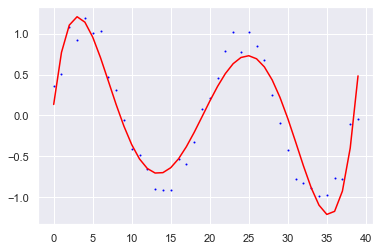

In [385]:
X = df_noise['x']
y = df_noise['y']


poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X.to_numpy().reshape(-1, 1))

reg = linear_model.LinearRegression()
reg.fit(X_poly, y)

#get R2 score
score = round(reg.score(X_poly, y), 4)
print(score)

pred = reg.predict(X_poly)
plt.scatter(X, y, color='blue', s=1)
plt.plot(X, pred, color='red')
plt.show()

In [386]:
X = df_hydro[['x0', 'x1', 'x2', 'x3', 'x4', 'x5']]
y = df_hydro['y']


poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

reg = linear_model.LinearRegression()
reg.fit(X_poly, y)

#get R2 score
score = round(reg.score(X_poly, y), 4)
print(score)

0.9303


In [393]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [409]:
X = df_noise['x']
y = df_noise['y']

msk = np.random.rand(len(df_noise)) < 0.8

X_train = X[msk]
X_test = X[~msk]

y_train = y[msk]
y_test = y[~msk]

In [439]:
ridge = Ridge(alpha=0.00001)

ridge.fit(X_train.to_numpy().reshape(-1, 1), y_train)
y_test_pred = ridge.predict(X_test.to_numpy().reshape(-1, 1))

print(r2_score(y_test, y_test_pred))

0.3290760480434122


In [442]:
X = df_hydro[['x0', 'x1', 'x2', 'x3', 'x4', 'x5']]
y = df_hydro['y']

msk = np.random.rand(len(df_hydro)) < 0.8

X_train = X[msk]
X_test = X[~msk]

y_train = y[msk]
y_test = y[~msk]

In [461]:
ridge = Ridge(alpha=0.7)

ridge.fit(X_train, y_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_test, y_test_pred))

0.6008893409371212


*alpha = 0.7*

In [462]:
from sklearn import linear_model

In [463]:
X = df_noise['x']
y = df_noise['y']

msk = np.random.rand(len(df_noise)) < 0.8

X_train = X[msk]
X_test = X[~msk]

y_train = y[msk]
y_test = y[~msk]

In [472]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train.to_numpy().reshape(-1, 1), y_train)

clf.predict(X_test.to_numpy().reshape(-1, 1))

array([ 0.4595198,  0.3365638,  0.1890166,  0.1398342,  0.0414694,
       -0.0323042, -0.0814866, -0.253625 , -0.376581 ])

In [475]:
X = df_hydro[['x0', 'x1', 'x2', 'x3', 'x4', 'x5']]
y = df_hydro['y']

msk = np.random.rand(len(df_hydro)) < 0.8

X_train = X[msk]
X_test = X[~msk]

y_train = y[msk]
y_test = y[~msk]

In [478]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

clf.predict(X_test)

array([-4.98951283,  0.70375191,  6.39701664, 14.93691375, 17.78354611,
       -7.88603861,  0.6538585 ,  6.34712323, 17.7336527 , 20.58028507,
       26.27354981,  0.77517826,  6.468443  ,  9.31507537, 12.16170773,
       15.0083401 ,  3.53751241,  9.23077714, -7.90048606, -2.20722132,
        0.63941105, -4.93909422, 12.14069998, 14.98733235, 12.07110718,
       -2.12423146, 26.34209222,  9.5034636 , 12.35009596, 18.0433607 ,
        6.09201691, 17.47854638, 26.58063183, 11.78265568, 20.32255278,
       -7.85190101, 29.15431977,  3.53410327, 14.92063274, -5.0514857 ,
       26.59638765, -5.28138272, 23.18494096,  3.23277989, 17.46594173,
       20.3125741 , 28.8524712 , -2.13342697, -4.97690818, -2.13027581,
       23.4894155 , 26.33604787])